In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Non-metric Methods

###  Introduction

We have considered pattern recognition based on feature vectors of real-valued and discrete-valued numbers, and in all cases, there has been a natural measure of distance between such vectors. For instance, in the nearest-neighbor classifier, the notion of distance figures conspicuously — indeed it is the core of the technique — while for neural networks, the notion of similarity appears when two input vectors sufficiently “close” lead to similar outputs. Most practical pattern recognition methods address problems of this sort, where feature vectors are real-valued and there exists some notion of metric.

But suppose a classification problem involves nominal data — for instance, descriptions that are discrete and without any natural notion of similarity or even ordering. Consider the use of information about teeth in the classification of fish and sea mammals. Some teeth are small and fine (as in baleen whales) for straining tiny prey from the sea. Others (as in sharks) come in multiple rows. Some sea creatures, such as walruses, have tusks. Yet others, such as squid, lack teeth altogether. There is no clear notion of similarity (or metric) for this information about teeth: it is meaningless to consider the teeth of a baleen whale any more similar to or different from the tusks of a walrus, than it is the distinctive rows of teeth in a shark from their absence in a squid, for example.

Thus, in this chapter, our attention turns away from describing patterns by vectors of real numbers and toward using lists of attributes. A common approach is to specify the values of a fixed number of properties by a property $ d $-tuple. For example, consider describing a piece of fruit by the four properties of color, texture, taste, and smell. Then a particular piece of fruit might be described by the 4-tuple $ \{ \text{red}, \text{shiny}, \text{sweet}, \text{small} \} $, which is a shorthand for:

$$
\text{color} = \text{red}, \quad \text{texture} = \text{shiny}, \quad \text{taste} = \text{sweet}, \quad \text{size} = \text{small}.
$$

Another common approach is to describe the pattern by a variable-length string of nominal attributes, such as a sequence of base pairs in a segment of DNA, e.g., "AGCTTCAGATTCCA." Such lists or strings might be themselves the output of other component classifiers of the type we have seen elsewhere. For instance, we might train a neural network to recognize different component brush strokes used in Chinese and Japanese characters (roughly a dozen basic forms); a classifier would then accept as inputs a list of these nominal attributes and make the final, full character classification.

How can we best use such nominal data for classification? Most importantly, how can we efficiently learn categories using such non-metric data? If there is structure in strings, how can it be represented? In considering such problems, we move beyond the notion of continuous probability distributions and metrics toward discrete problems that are addressed by rule-based or syntactic pattern recognition methods.

##  Decision Trees

It is natural and intuitive to classify a pattern through a sequence of questions, in which the next question asked depends on the answer to the current question. This “20-questions” approach is particularly useful for non-metric data, since all of the questions can be asked in a “yes/no” or “true/false” or “value(property) ∈ set of values” style that does not require any notion of metric. 

Such a sequence of questions is displayed in a directed decision tree or simply a tree, where by convention, the first or root node is displayed at the top, connected by successive (directional) links or branches to other nodes. These are similarly connected until we reach terminal or leaf nodes, which have no further links (Fig. 8.1). 

The classification of a particular pattern begins at the root node, which asks for the value of a particular property of the pattern. The different links from the root node correspond to the different possible values. Based on the answer, we follow the appropriate link to a subsequent or descendant node. In the trees we shall discuss, the links must be mutually distinct and exhaustive, i.e., one and only one link will be followed. The next step is to make the decision at the appropriate subsequent node, which can be considered the root of a sub-tree. We continue this way until we reach a leaf node, which has no further question. Each leaf node bears a category label and the test pattern is assigned the category of the leaf node reached.

The simple decision tree in Fig.1 illustrates one benefit of trees over many other classifiers such as neural networks: interpretability. It is a straightforward matter to render the information in such a tree as logical expressions. Such interpretability has two manifestations:

1. We can easily interpret the decision for any particular test pattern as the conjunction of decisions along the path to its corresponding leaf node. Thus, if the properties are $ \{ \text{taste}, \text{color}, \text{shape}, \text{size} \} $, the pattern $ x = \{ \text{sweet}, \text{yellow}, \text{thin}, \text{medium} \} $ is classified as **Banana** because it is:

$$
(\text{color} = \text{yellow}) \quad \text{AND} \quad (\text{shape} = \text{thin}).
$$

2. We can occasionally get clear interpretations of the categories themselves, by creating logical descriptions using conjunctions and disjunctions. For instance, the tree shows:

$$
\text{Apple} = (\text{green} \quad \text{AND} \quad \text{medium}) \quad \text{OR} \quad (\text{red} \quad \text{AND} \quad \text{medium}).
$$

Rules derived from trees — especially large trees — are often quite complicated and must be reduced to aid interpretation. For our example, one simple rule describes:

$$
\text{Apple} = (\text{medium} \quad \text{AND} \quad \text{NOT yellow}).
$$

Another benefit of trees is that they lead to **rapid classification**, employing a sequence of typically simple queries. Finally, we note that trees provide a natural way to incorporate prior knowledge from human experts. In practice, though, such expert knowledge is of greatest use when the classification problem is fairly simple and the training set is small.


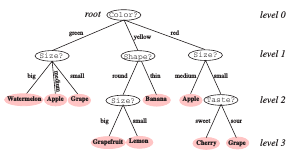

Fig.1: Classiﬁcation in a basic decision tree proceeds from top to bottom. The questions asked at each node concern a particular property of the pattern, and the downward links correspond to the possible values. Successive nodes are visited until a terminal or leaf node is reached, where the category label is read. Note that the same question, Size?, appears in diﬀerent places in the tree, and that diﬀerent questions can have diﬀerent numbers of branches. Moreover, diﬀerent leaf nodes, shown in pink, can be labeled by the same category (e.g., Apple).

In [1]:
import pandas as pd

# Sample dataset of fruits with nominal data
data = {
    'Color': ['Green', 'Red', 'Yellow', 'Green', 'Yellow', 'Red', 'Yellow'],
    'Size': ['Medium', 'Medium', 'Small', 'Big', 'Small', 'Medium', 'Big'],
    'Shape': ['Round', 'Round', 'Thin', 'Round', 'Thin', 'Round', 'Round'],
    'Taste': ['Sour', 'Sweet', 'Sweet', 'Sweet', 'Sour', 'Sweet', 'Sour'],
    'Fruit': ['Apple', 'Apple', 'Banana', 'Watermelon', 'Banana', 'Apple', 'Watermelon']
}

# Convert to DataFrame
df = pd.DataFrame(data)
print("Original Dataset:")
print(df)

# Decision Tree Classifier function
def decision_tree_classifier(pattern):
    """
    A basic decision tree classifier that classifies based on fruit attributes
    such as color, size, shape, and taste.
    """
    # Root Node: First, we check for the color
    if pattern['Color'] == 'Green':
        if pattern['Size'] == 'Medium':
            return 'Apple'
        elif pattern['Size'] == 'Big':
            return 'Watermelon'
    elif pattern['Color'] == 'Red':
        if pattern['Size'] == 'Medium':
            return 'Apple'
        elif pattern['Size'] == 'Big':
            return 'Watermelon'
    elif pattern['Color'] == 'Yellow':
        if pattern['Size'] == 'Small':
            return 'Banana'
        elif pattern['Size'] == 'Big':
            return 'Watermelon'
    return 'Unknown'

# Function to classify all data
def classify_all(df):
    classifications = []
    for i, row in df.iterrows():
        pattern = {
            'Color': row['Color'],
            'Size': row['Size'],
            'Shape': row['Shape'],
            'Taste': row['Taste']
        }
        classification = decision_tree_classifier(pattern)
        classifications.append(classification)
    return classifications

# Classify the entire dataset
df['Predicted'] = classify_all(df)

# Print the dataset with predictions
print("\nDataset with Predictions:")
print(df)

# Test the classifier on a new pattern (e.g., a yellow, small fruit)
new_pattern = {'Color': 'Yellow', 'Size': 'Small', 'Shape': 'Thin', 'Taste': 'Sweet'}
classification = decision_tree_classifier(new_pattern)
print(f"\nClassification of new pattern {new_pattern}: {classification}")


Original Dataset:
    Color    Size  Shape  Taste       Fruit
0   Green  Medium  Round   Sour       Apple
1     Red  Medium  Round  Sweet       Apple
2  Yellow   Small   Thin  Sweet      Banana
3   Green     Big  Round  Sweet  Watermelon
4  Yellow   Small   Thin   Sour      Banana
5     Red  Medium  Round  Sweet       Apple
6  Yellow     Big  Round   Sour  Watermelon

Dataset with Predictions:
    Color    Size  Shape  Taste       Fruit   Predicted
0   Green  Medium  Round   Sour       Apple       Apple
1     Red  Medium  Round  Sweet       Apple       Apple
2  Yellow   Small   Thin  Sweet      Banana      Banana
3   Green     Big  Round  Sweet  Watermelon  Watermelon
4  Yellow   Small   Thin   Sour      Banana      Banana
5     Red  Medium  Round  Sweet       Apple       Apple
6  Yellow     Big  Round   Sour  Watermelon  Watermelon

Classification of new pattern {'Color': 'Yellow', 'Size': 'Small', 'Shape': 'Thin', 'Taste': 'Sweet'}: Banana


In [2]:
import pandas as pd

# Sample dataset of fruits with nominal data
data = {
    'Color': ['Green', 'Red', 'Yellow', 'Green', 'Yellow', 'Red', 'Yellow'],
    'Size': ['Medium', 'Medium', 'Small', 'Big', 'Small', 'Medium', 'Big'],
    'Shape': ['Round', 'Round', 'Thin', 'Round', 'Thin', 'Round', 'Round'],
    'Taste': ['Sour', 'Sweet', 'Sweet', 'Sweet', 'Sour', 'Sweet', 'Sour'],
    'Fruit': ['Apple', 'Apple', 'Banana', 'Watermelon', 'Banana', 'Apple', 'Watermelon']
}

# Convert to DataFrame
df = pd.DataFrame(data)
print("Original Dataset:")
print(df)

# Decision Tree Classifier function
def decision_tree_classifier(pattern):
    """
    A basic decision tree classifier that classifies based on fruit attributes
    such as color, size, shape, and taste.
    """
    # Root Node: First, we check for the color
    if pattern['Color'] == 'Green':
        if pattern['Size'] == 'Medium':
            return 'Apple'
        elif pattern['Size'] == 'Big':
            return 'Watermelon'
    elif pattern['Color'] == 'Red':
        if pattern['Size'] == 'Medium':
            return 'Apple'
        elif pattern['Size'] == 'Big':
            return 'Watermelon'
    elif pattern['Color'] == 'Yellow':
        if pattern['Size'] == 'Small':
            return 'Banana'
        elif pattern['Size'] == 'Big':
            return 'Watermelon'
    return 'Unknown'

# Function to classify all data
def classify_all(df):
    classifications = []
    for i, row in df.iterrows():
        pattern = {
            'Color': row['Color'],
            'Size': row['Size'],
            'Shape': row['Shape'],
            'Taste': row['Taste']
        }
        classification = decision_tree_classifier(pattern)
        classifications.append(classification)
    return classifications

# Classify the entire dataset
df['Predicted'] = classify_all(df)

# Print the dataset with predictions
print("\nDataset with Predictions:")
print(df)

# Test the classifier on a new pattern (e.g., a yellow, small fruit)
new_pattern = {'Color': 'Yellow', 'Size': 'Small', 'Shape': 'Thin', 'Taste': 'Sweet'}
classification = decision_tree_classifier(new_pattern)
print(f"\nClassification of new pattern {new_pattern}: {classification}")


Original Dataset:
    Color    Size  Shape  Taste       Fruit
0   Green  Medium  Round   Sour       Apple
1     Red  Medium  Round  Sweet       Apple
2  Yellow   Small   Thin  Sweet      Banana
3   Green     Big  Round  Sweet  Watermelon
4  Yellow   Small   Thin   Sour      Banana
5     Red  Medium  Round  Sweet       Apple
6  Yellow     Big  Round   Sour  Watermelon

Dataset with Predictions:
    Color    Size  Shape  Taste       Fruit   Predicted
0   Green  Medium  Round   Sour       Apple       Apple
1     Red  Medium  Round  Sweet       Apple       Apple
2  Yellow   Small   Thin  Sweet      Banana      Banana
3   Green     Big  Round  Sweet  Watermelon  Watermelon
4  Yellow   Small   Thin   Sour      Banana      Banana
5     Red  Medium  Round  Sweet       Apple       Apple
6  Yellow     Big  Round   Sour  Watermelon  Watermelon

Classification of new pattern {'Color': 'Yellow', 'Size': 'Small', 'Shape': 'Thin', 'Taste': 'Sweet'}: Banana


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import preprocessing
import graphviz
from sklearn.tree import export_graphviz

# Sample dataset of fruits with nominal data
data = {
    'Color': ['Green', 'Red', 'Yellow', 'Green', 'Yellow', 'Red', 'Yellow'],
    'Size': ['Medium', 'Medium', 'Small', 'Big', 'Small', 'Medium', 'Big'],
    'Shape': ['Round', 'Round', 'Thin', 'Round', 'Thin', 'Round', 'Round'],
    'Taste': ['Sour', 'Sweet', 'Sweet', 'Sweet', 'Sour', 'Sweet', 'Sour'],
    'Fruit': ['Apple', 'Apple', 'Banana', 'Watermelon', 'Banana', 'Apple', 'Watermelon']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Encode the categorical variables into numerical labels
label_encoder = preprocessing.LabelEncoder()

df['Color'] = label_encoder.fit_transform(df['Color'])
df['Size'] = label_encoder.fit_transform(df['Size'])
df['Shape'] = label_encoder.fit_transform(df['Shape'])
df['Taste'] = label_encoder.fit_transform(df['Taste'])
df['Fruit'] = label_encoder.fit_transform(df['Fruit'])

# Features and target
X = df[['Color', 'Size', 'Shape', 'Taste']]  # Features
y = df['Fruit']  # Target variable (labels)

# Create and fit the decision tree classifier
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(X, y)

# Plot the decision tree using sklearn's plot_tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=['Color', 'Size', 'Shape', 'Taste'], class_names=label_encoder.classes_)
plt.title("Decision Tree Classifier")
plt.show()

# Export the decision tree to a Graphviz format and display it
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=['Color', 'Size', 'Shape', 'Taste'],  
                           class_names=label_encoder.classes_,  
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("decision_tree")  # Save it to a file 'decision_tree.pdf'
graph.view()  # This will open the tree in the default PDF viewer


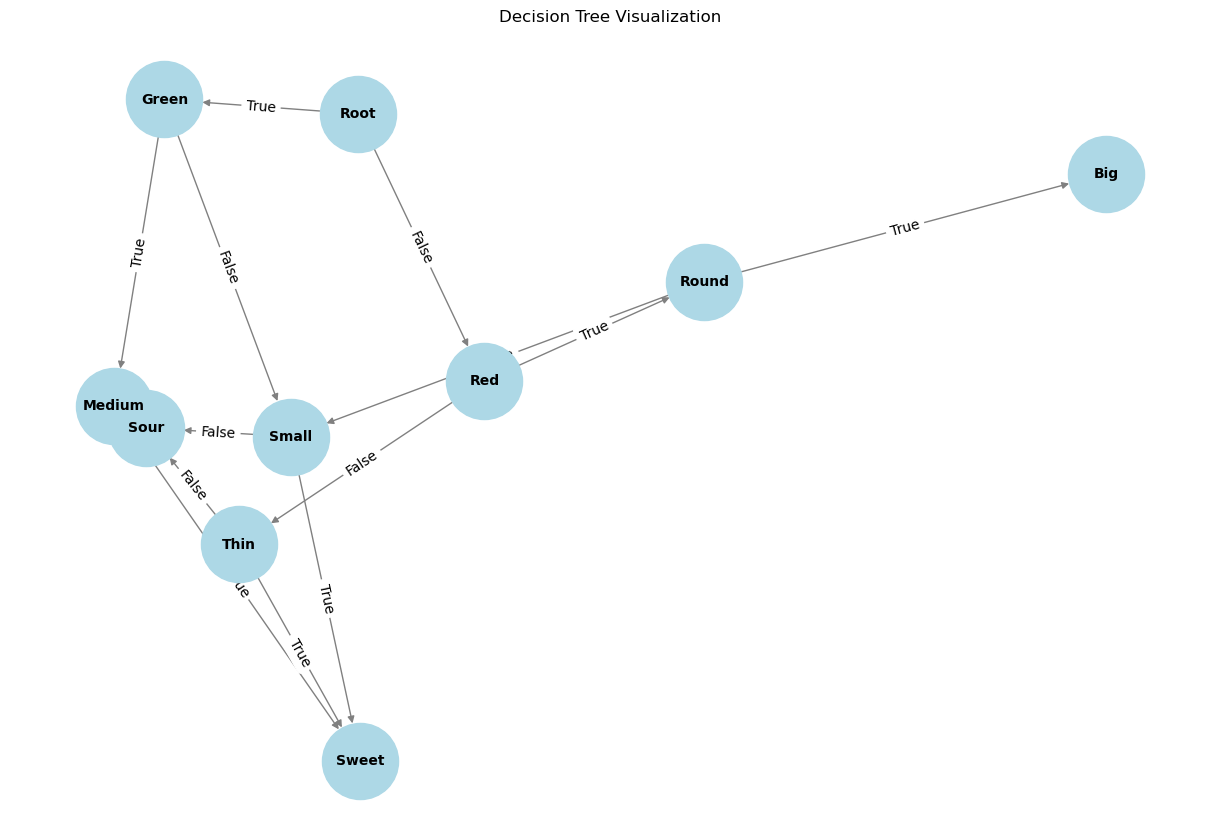

In [4]:
import matplotlib.pyplot as plt
import networkx as nx

# Example tree data (hardcoded, you can modify based on your tree structure)
# Tree structure (with decision rules and classifications at leaf nodes)
# Format: (Parent Node, Question, [True Child, False Child], Leaf Label)

tree_data = [
    ("Root", "Color", ["Green", "Red"], None),
    ("Green", "Size", ["Medium", "Small"], "Apple"),
    ("Red", "Shape", ["Round", "Thin"], None),
    ("Medium", "Taste", ["Sweet", "Sour"], "Apple"),
    ("Small", "Taste", ["Sweet", "Sour"], "Banana"),
    ("Round", "Size", ["Big", "Small"], "Watermelon"),
    ("Thin", "Taste", ["Sweet", "Sour"], "Banana"),
    ("Big", None, None, "Watermelon"),
]

# Initialize graph for plotting the tree
G = nx.DiGraph()

# Add nodes and edges based on the tree structure
for parent, question, children, label in tree_data:
    if question is not None:
        G.add_node(parent, label=question)
        G.add_node(children[0], label=label if label else None)
        G.add_node(children[1], label=label if label else None)
        G.add_edge(parent, children[0], label="True")
        G.add_edge(parent, children[1], label="False")
    else:
        G.add_node(parent, label=label)

# Define position for nodes in the graph layout
pos = nx.spring_layout(G, seed=42)

# Draw the tree with labels
plt.figure(figsize=(12, 8))
labels = nx.get_node_attributes(G, 'label')

# Draw the graph
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray', linewidths=1, arrows=True)

# Annotate edges with labels (True/False branches)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color='black')

plt.title("Decision Tree Visualization")
plt.show()


                [Color]
               /      \
           Green?     Not Green?
           /   \           /    \
      [Size]   [Taste] [Shape]  [Taste]
        /  \     /    \   /   \     /   \
   Medium Small Sweet Sour Round Thin Sweet Sour
    /      \     |     |      |     |      |
  Apple   Grape  Apple  Banana Watermelon Banana


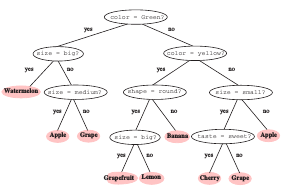

Fig.2: A tree with arbitrary branching factor at diﬀerent nodes can always be represented by a functionally equivalent binary tree, i.e., one having branching factor B = 2 throughout. By convention the “yes” branch is on the left, the “no” branch on the right. This binary tree contains the same information and implements the same classiﬁcation as that in Fig.1.

## CART (Classification and Regression Trees)

In this section, we explore the **CART (Classification and Regression Trees)** algorithm and its implementation for creating decision trees. The goal of the CART approach is to generate a tree that classifies or predicts data in a simple, efficient, and interpretable manner. Let's break down the key components involved in the tree-growing process.

##  Number of Splits

- Each **node** in the tree makes a split of the data based on a decision (e.g., "Is the color green?").
- The number of splits at each node, known as the **branching factor** or **branching ratio (B)**, can vary depending on how the tree is designed. However, in practice, we often use **binary splits**, meaning each node only has two possible outcomes (e.g., yes/no, true/false).

##  Test Selection and Node Impurity

- The key decision-making step is determining which **property** (or attribute) to test at each node.
- The goal is to choose a property test that will **minimize the impurity** at the child nodes. Impurity measures how mixed the data is in terms of category labels. A pure node has data from only one category.

### Impurity Measures

1. **Entropy Impurity**:
   Entropy is commonly used as an impurity measure. It quantifies how mixed the data is. The formula for entropy is:

   $$
   i(N) = - \sum_{j} P(\omega_j) \log_2 P(\omega_j)
   $$

   where $P(\omega_j)$ is the probability of class $ \omega_j $ at node $ N $.

   - If a node contains patterns from only one category, the entropy is 0 (pure).
   - The entropy is maximized when the categories are equally likely.

2. **Variance Impurity (for binary classification)**:
   In the case of binary classification, variance impurity is defined as:

   $$
   i(N) = P(\omega_1) \cdot P(\omega_2)
   $$

   where $ P(\omega_1) $ and $ P(\omega_2) $ are the proportions of each class at node $ N $. This is useful when dealing with binary classes, as it measures how far the proportions are from being equal.

## Decision Tree Growing Process

1. **Choose a Property**: For each node, evaluate different properties and determine which one minimizes the impurity. For instance, for a dataset of fruit with properties like **color** and **size**, you would evaluate the impurity for each property (e.g., "Is color = green?").
  
2. **Split the Data**: Once the best property is chosen, split the data into subsets based on the values of that property. For example, if the property is "color", you might split the data into subsets of **green** and **non-green** fruits.

3. **Recursion**: Repeat the process for each child node, selecting the best property and splitting the data further. The recursion stops when:
   - A node is "pure" (all patterns belong to the same category).
   - A predefined stopping criterion is met (e.g., maximum tree depth or minimum number of samples per node).

4. **Leaf Nodes**: When no further splitting is possible or required, the node becomes a **leaf node**. This node assigns a class label based on the majority class of the data in that subset.

## Tree Pruning

- Overfitting is a common issue with decision trees, where the tree becomes too large and complex, capturing noise in the data rather than general patterns.
- **Pruning** is the process of removing parts of the tree that do not provide significant predictive power, typically done after the tree has been grown.

## Handling Missing Data

- CART can handle missing data by using strategies like **surrogate splits**, where an alternative decision is made if the primary attribute is missing.

## Example of Decision Tree Structure

Here's an example of how a simple decision tree might look for classifying fruits based on properties like color, size, and taste:



Predictions: [0, 0, 0, 1, 1, 1]


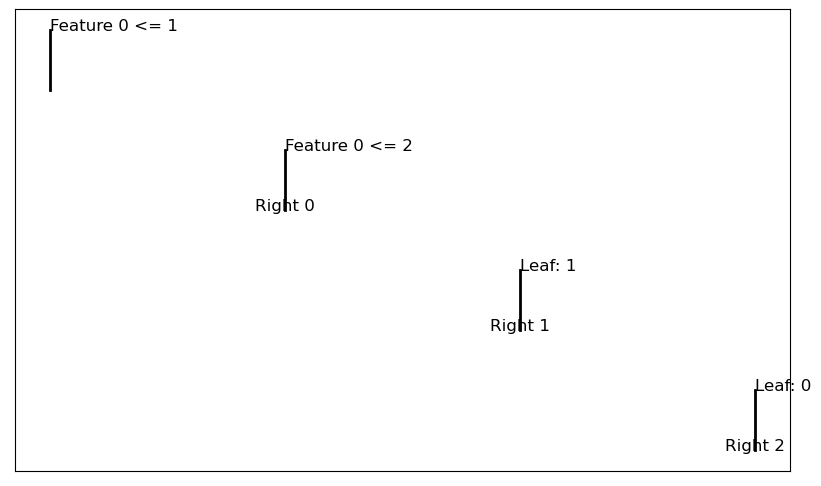

In [7]:
import matplotlib.pyplot as plt
from collections import Counter
import math


class DecisionTreeCART:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        """Fit the decision tree model."""
        self.tree = self._build_tree(X, y)

    def predict(self, X):
        """Predict the class labels for the given input data."""
        return [self._predict_sample(sample, self.tree) for sample in X]

    def _build_tree(self, X, y, depth=0):
        """Build the decision tree recursively."""
        # If all labels are the same, return a leaf node
        if len(set(y)) == 1:
            return {'label': y[0]}

        # If max depth is reached, return a leaf node with the majority class
        if self.max_depth is not None and depth >= self.max_depth:
            return {'label': Counter(y).most_common(1)[0][0]}

        # Find the best feature and threshold to split on
        best_feature, best_threshold = self._best_split(X, y)
        
        # Split the data based on the best feature and threshold
        left_mask = [sample[best_feature] <= best_threshold for sample in X]
        right_mask = [not mask for mask in left_mask]
        
        # Create sub-trees
        left_tree = self._build_tree([sample for i, sample in enumerate(X) if left_mask[i]],
                                     [label for i, label in enumerate(y) if left_mask[i]],
                                     depth + 1)
        
        right_tree = self._build_tree([sample for i, sample in enumerate(X) if right_mask[i]],
                                      [label for i, label in enumerate(y) if right_mask[i]],
                                      depth + 1)

        # Return the node with the best feature and threshold
        return {'feature': best_feature, 'threshold': best_threshold, 'left': left_tree, 'right': right_tree}

    def _best_split(self, X, y):
        """Find the best feature and threshold to split the data."""
        best_gini = float('inf')
        best_feature = None
        best_threshold = None
        
        for feature in range(len(X[0])):
            # Get all unique values for the feature
            values = set([sample[feature] for sample in X])
            
            for threshold in values:
                left_labels = [y[i] for i in range(len(X)) if X[i][feature] <= threshold]
                right_labels = [y[i] for i in range(len(X)) if X[i][feature] > threshold]
                
                gini = self._gini_index(left_labels, right_labels)
                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature
                    best_threshold = threshold
        
        return best_feature, best_threshold

    def _gini_index(self, left_labels, right_labels):
        """Calculate the Gini index for a split."""
        left_size = len(left_labels)
        right_size = len(right_labels)
        total_size = left_size + right_size

        left_impurity = 1 - sum([(left_labels.count(label) / left_size) ** 2 for label in set(left_labels)])
        right_impurity = 1 - sum([(right_labels.count(label) / right_size) ** 2 for label in set(right_labels)])
        
        return (left_size / total_size) * left_impurity + (right_size / total_size) * right_impurity

    def _predict_sample(self, sample, tree):
        """Predict the class for a single sample."""
        if 'label' in tree:
            return tree['label']
        
        if sample[tree['feature']] <= tree['threshold']:
            return self._predict_sample(sample, tree['left'])
        else:
            return self._predict_sample(sample, tree['right'])

    def plot_tree(self, tree=None, depth=0, parent_name=None, graph=None):
        """Plot the decision tree using matplotlib."""
        if graph is None:
            graph = {}
        if tree is None:
            tree = self.tree

        if 'label' in tree:
            graph[depth] = (parent_name, f"Leaf: {tree['label']}")
            return graph
        
        feature = tree['feature']
        threshold = tree['threshold']
        graph[depth] = (parent_name, f"Feature {feature} <= {threshold}")

        left_graph = self.plot_tree(tree['left'], depth + 1, f"Left {depth}", graph)
        right_graph = self.plot_tree(tree['right'], depth + 1, f"Right {depth}", graph)
        
        return {**graph, **left_graph, **right_graph}

    def draw_tree(self):
        """Generate and display the decision tree using matplotlib."""
        graph = self.plot_tree()
        
        fig, ax = plt.subplots(figsize=(10, 6))
        for key, (parent, child) in graph.items():
            ax.text(key, 1 - 0.1 * key, child, fontsize=12)
            ax.plot([key, key], [1 - 0.1 * key, 1 - 0.1 * key - 0.05], 'k-', lw=2)
            ax.text(key, 1 - 0.1 * key - 0.05, parent, fontsize=12, ha='center')
        
        ax.set_xticks([])
        ax.set_yticks([])
        plt.show()

# Example of usage
if __name__ == "__main__":
    # Example dataset (X: features, y: labels)
    X = [
        [1, 1],  # Feature 1, Feature 2
        [2, 2],
        [1, 2],
        [3, 1],
        [2, 1],
        [3, 2]
    ]
    y = [0, 0, 0, 1, 1, 1]  # Labels

    # Instantiate and train the decision tree classifier
    clf = DecisionTreeCART(max_depth=3)
    clf.fit(X, y)

    # Predictions for the training data
    predictions = clf.predict(X)
    print(f"Predictions: {predictions}")

    # Visualize the decision tree
    clf.draw_tree()
